In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
# from modules.lib.ChextXRayImages import *
# from modules.lib.Metrics import *
# from modules.lib.TrainingLoop import *
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=18) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [5]:
standardTraining = StandardTraining(number_images=500, 
                                     batch_size=1, 
                                     learning_rate=1e-3, 
                                     num_epochs=4,
                                     device=device, 
                                     net=net)

C:\git\Springboard-Public\Capstone Project 2\modules\lib\ChextXRayImages.py:251: UserWarning: 
Feature Imbalance Detected (train % - val %):
   Enlarged_Cardiomediastinum: 3.18%
   Edema: 2.33%
   Consolidation: 2.17%
   Pneumothorax: 4.84%
   Pleural_Effusion: 3.32%

  self.warnFeatureImbalance(train, value)


In [6]:
standardTraining.train()

Epoch [1/4]
Epoch Loss: 149.0256         
Training Time: 0:00:16.880851)          
Validation Time: 0:00:01.075126)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.000000,0.000000,0.000000,0.458943,0.114925
4,Edema,93,0.064516,0.285714,0.105263,0.558040,0.285651
5,Consolidation,20,0.000000,0.000000,0.000000,0.486968,0.049761
7,Atelectasis,58,0.017241,0.111111,0.029851,0.510559,0.152288
9,Pleural_Effusion,135,0.103704,0.233333,0.143590,0.485426,0.328913



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\youci\Ap

,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.000000,0.000000,NaN,0.251417
4,Edema,22,0.0,0.000000,0.000000,NaN,0.308579
5,Consolidation,3,0.0,0.000000,0.000000,NaN,0.042137
7,Atelectasis,19,0.0,0.000000,0.000000,NaN,0.174669
9,Pleural_Effusion,32,1.0,0.307692,0.470588,NaN,0.280101


{'ROC AUC': ValueError('Only one class present in y_true. ROC AUC score is not defined in that case.')}
Epoch [2/4]
Epoch Loss: 137.7689         
Training Time: 0:00:16.846964)          
Validation Time: 0:00:01.104050)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.00000,0.000000,0.000000,0.508135,0.117022
4,Edema,93,0.00000,0.000000,0.000000,0.501366,0.233122
5,Consolidation,20,0.00000,0.000000,0.000000,0.602128,0.095695
7,Atelectasis,58,0.00000,0.000000,0.000000,0.453581,0.155166
9,Pleural_Effusion,135,0.02963,0.307692,0.054054,0.498992,0.335200



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\youci\Ap

,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.0,0.0,NaN,0.374761
4,Edema,22,0.0,0.0,0.0,NaN,0.376691
5,Consolidation,3,0.0,0.0,0.0,NaN,0.027798
7,Atelectasis,19,0.0,0.0,0.0,NaN,0.154037
9,Pleural_Effusion,32,0.0,0.0,0.0,NaN,0.448055


{'ROC AUC': ValueError('Only one class present in y_true. ROC AUC score is not defined in that case.')}
Epoch [3/4]
Epoch Loss: 136.9010         
Training Time: 0:00:16.780143)          
Validation Time: 0:00:01.072159)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.00000,0.000000,0.000000,0.440646,0.110566
4,Edema,93,0.00000,0.000000,0.000000,0.519252,0.243721
5,Consolidation,20,0.00000,0.000000,0.000000,0.325133,0.036202
7,Atelectasis,58,0.00000,0.000000,0.000000,0.463834,0.151318
9,Pleural_Effusion,135,0.02963,0.235294,0.052632,0.474557,0.319370



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\youci\Ap

,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0000,0.000000,0.000000,NaN,0.440527
4,Edema,22,0.0000,0.000000,0.000000,NaN,0.385449
5,Consolidation,3,0.0000,0.000000,0.000000,NaN,0.033110
7,Atelectasis,19,0.0000,0.000000,0.000000,NaN,0.146706
9,Pleural_Effusion,32,0.8125,0.285714,0.422764,NaN,0.259852


{'ROC AUC': ValueError('Only one class present in y_true. ROC AUC score is not defined in that case.')}
Epoch [4/4]
Epoch Loss: 135.9060         
Training Time: 0:00:16.754217)          
Validation Time: 0:00:01.074129)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.000000,0.000000,0.000000,0.508642,0.116861
4,Edema,93,0.000000,0.000000,0.000000,0.498527,0.251273
5,Consolidation,20,0.000000,0.000000,0.000000,0.461702,0.059399
7,Atelectasis,58,0.000000,0.000000,0.000000,0.563456,0.175089
9,Pleural_Effusion,135,0.044444,0.272727,0.076433,0.529814,0.353236



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\youci\Ap

,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.0,0.0,NaN,0.378025
4,Edema,22,0.0,0.0,0.0,NaN,0.348789
5,Consolidation,3,0.0,0.0,0.0,NaN,0.036445
7,Atelectasis,19,0.0,0.0,0.0,NaN,0.159279
9,Pleural_Effusion,32,0.0,0.0,0.0,NaN,0.449316


{'ROC AUC': ValueError('Only one class present in y_true. ROC AUC score is not defined in that case.')}



TRAINING



,Score for all Targets
Accuracy Score,0.184343
Hamming Loss,0.138678
Combined Recall,0.042045
Combined Precision,0.071970
Combined F1,0.049579


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,24,0.000000,0.000000,0.000000,0.553539,0.082344
1,Cardiomegaly,45,0.000000,0.000000,0.000000,0.508642,0.116861
2,Lung_Opacity,172,0.139535,0.413793,0.208696,0.497586,0.431351
3,Lung_Lesion,22,0.000000,0.000000,0.000000,0.530263,0.058992
4,Edema,93,0.000000,0.000000,0.000000,0.498527,0.251273
5,Consolidation,20,0.000000,0.000000,0.000000,0.461702,0.059399
6,Pneumonia,9,0.000000,0.000000,0.000000,0.370083,0.018620
7,Atelectasis,58,0.000000,0.000000,0.000000,0.563456,0.175089
8,Pneumothorax,42,0.000000,0.000000,0.000000,0.569276,0.148524
9,Pleural_Effusion,135,0.044444,0.272727,0.076433,0.529814,0.353236


***** ROC *****


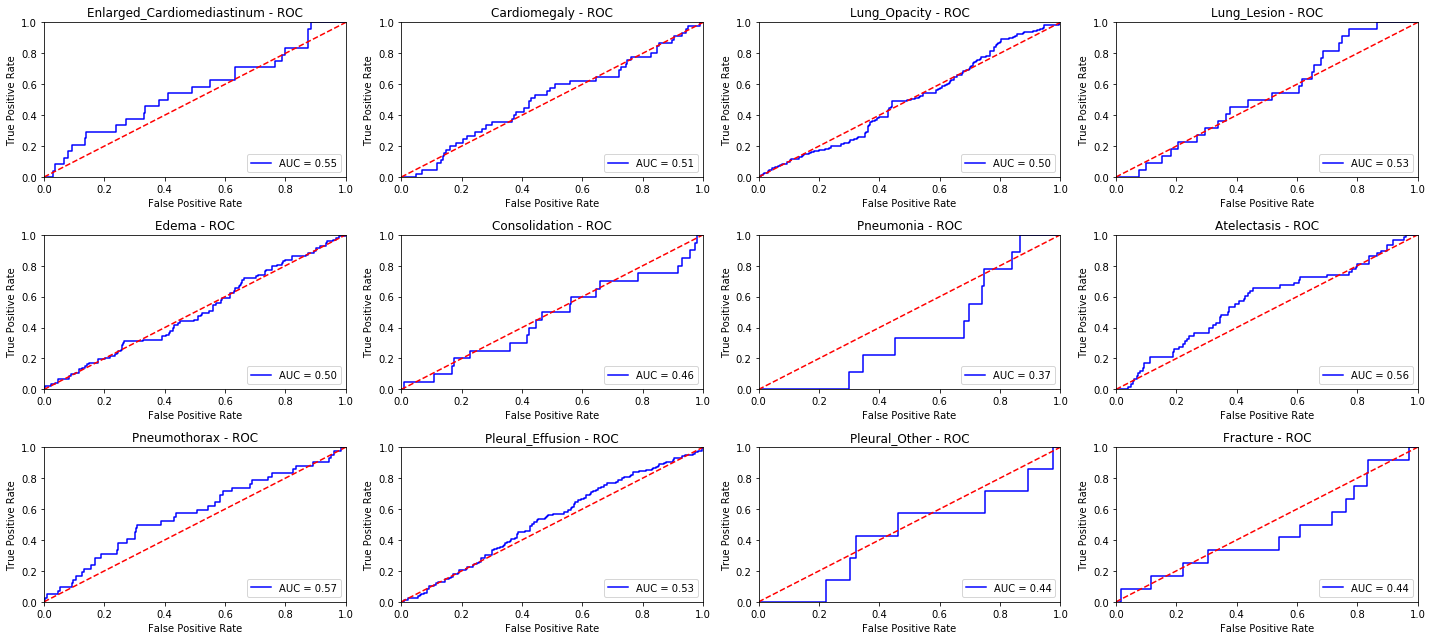

***** Precision / Recall *****


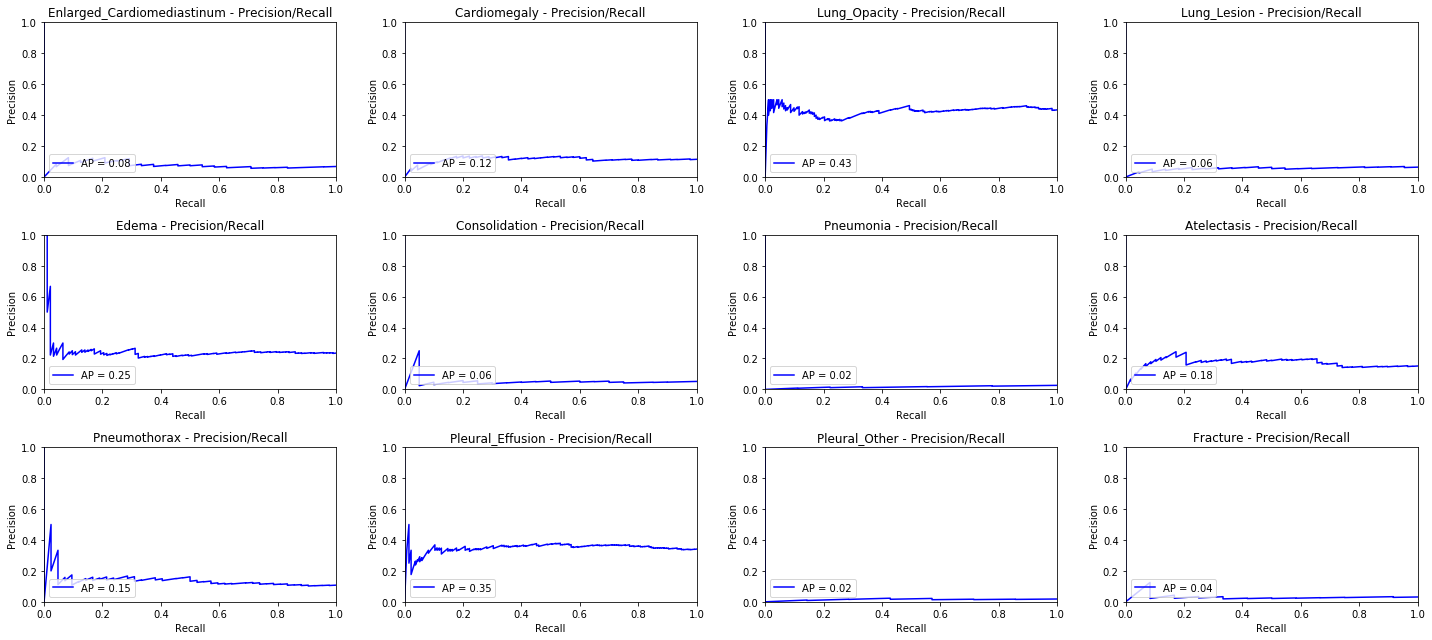


VALIDATION



,Score for all Targets
Accuracy Score,0.192308
Hamming Loss,0.138622
Combined Recall,0.000000
Combined Precision,0.000000
Combined F1,0.000000


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\youci\Ap

,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,3,0.0,0.0,0.0,NaN,0.031474
1,Cardiomegaly,14,0.0,0.0,0.0,NaN,0.378025
2,Lung_Opacity,60,0.0,0.0,0.0,NaN,0.637458
3,Lung_Lesion,7,0.0,0.0,0.0,NaN,0.159497
4,Edema,22,0.0,0.0,0.0,NaN,0.348789
5,Consolidation,3,0.0,0.0,0.0,NaN,0.036445
6,Pneumonia,1,0.0,0.0,0.0,NaN,0.012821
7,Atelectasis,19,0.0,0.0,0.0,NaN,0.159279
8,Pneumothorax,6,0.0,0.0,0.0,NaN,0.076295
9,Pleural_Effusion,32,0.0,0.0,0.0,NaN,0.449316


{'ROC AUC': ValueError('Only one class present in y_true. ROC AUC score is not defined in that case.')}
***** ROC *****


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


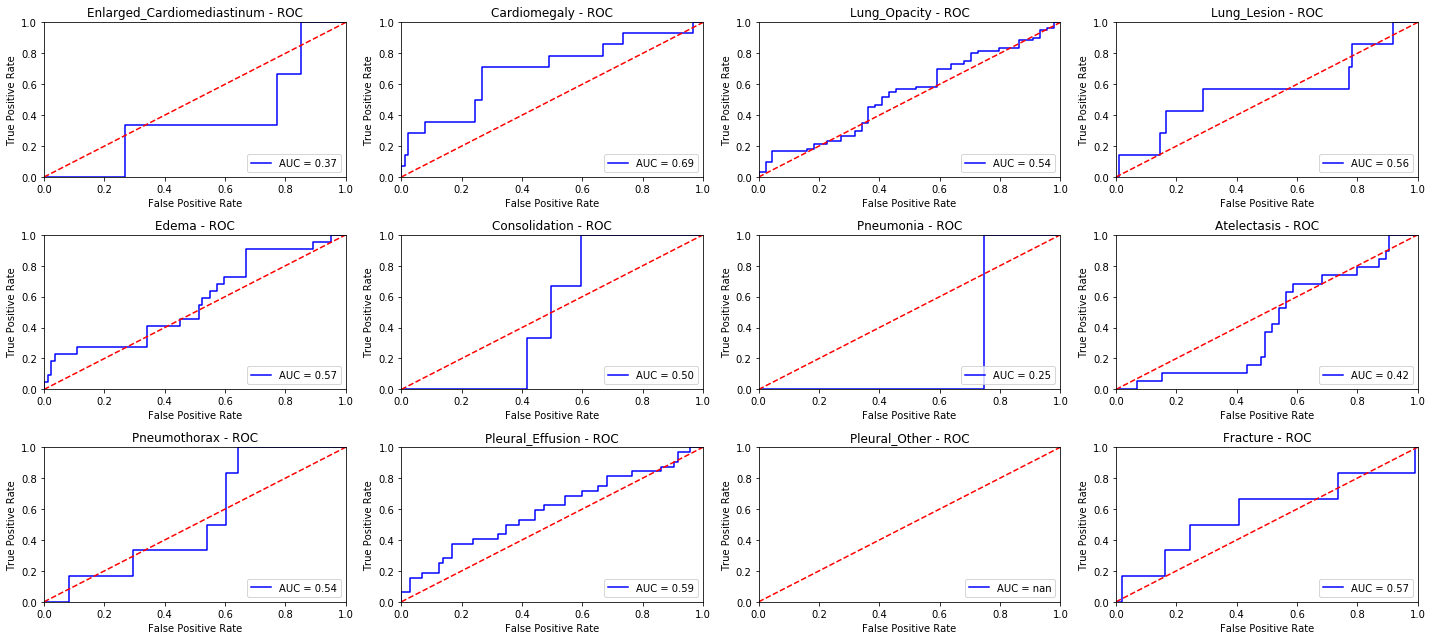

***** Precision / Recall *****


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


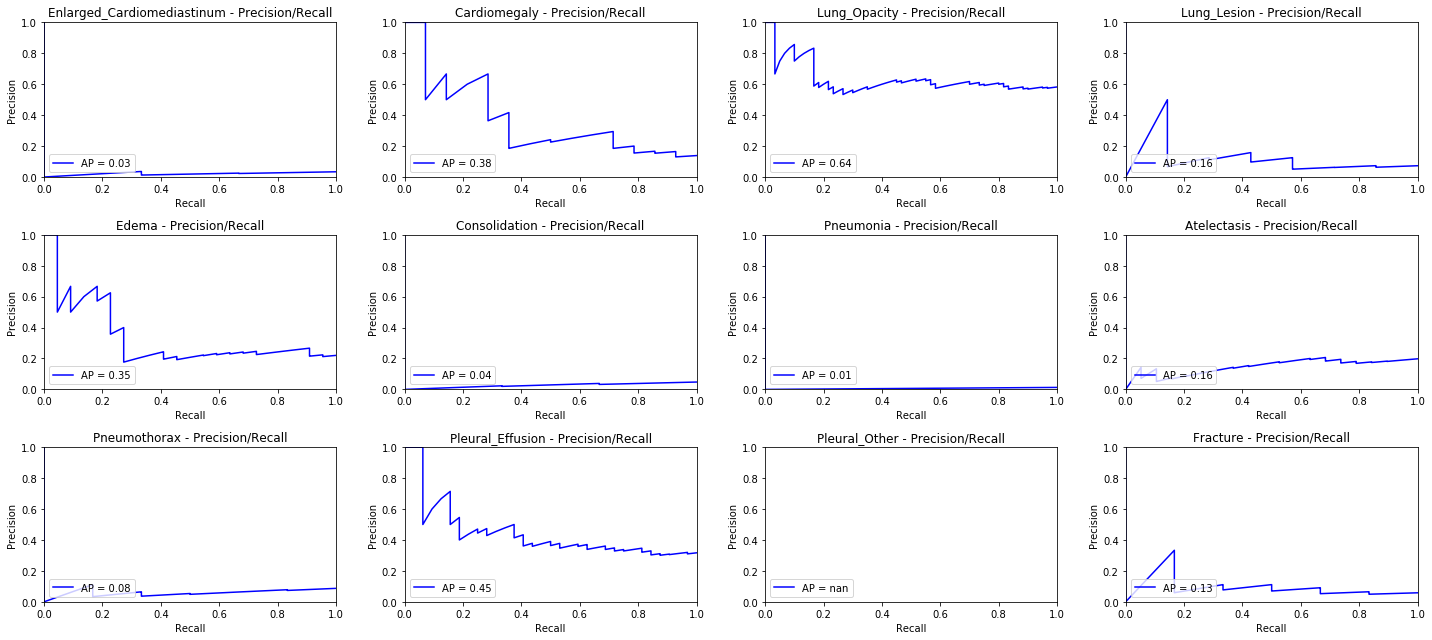

In [7]:
standardTraining.displayMetrics()